# KnapSack con PulP

https://coin-or.github.io/pulp/technical/pulp.html

In [1]:
# !pip install pulp

In [2]:
import numpy as np
import pulp as pl

## Problema

Tomado de: https://www.youtube.com/watch?v=n0z_AHX4Iwk&ab_channel=ElSr.Ingenierito

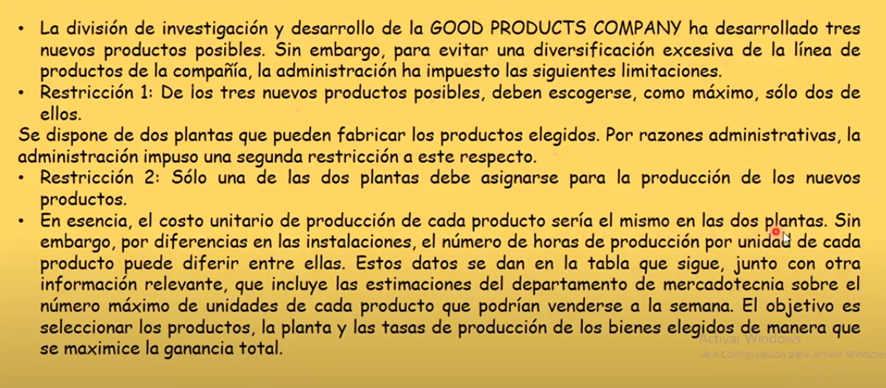

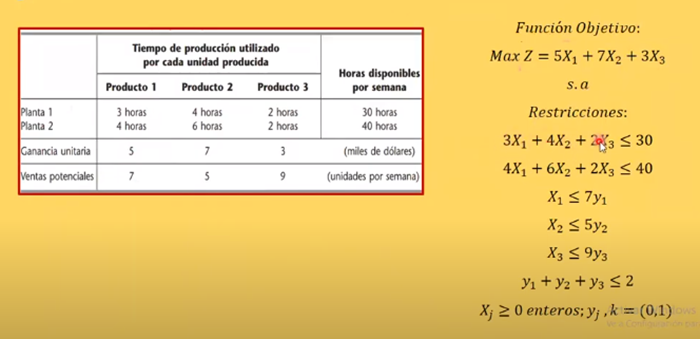

## Construcción de los vectores y matrices de datos

In [3]:
# Matriz de costos: coeficiente de la F.O.:
matriz_costos = np.array([5, 7, 3])

# Cantidad de horas por producto:
cant_hrs = np.array([[3, 4, 2],  # P1
                    [4, 6, 2]])  # P2
# Restricciones de horas:
restr_horas = np.array([30,   # P1
                        40])  # P2

# Restricciones de Demanda (Venta):
restr_demanda = np.array([7,  # Q 1
                         5,   # Q 2
                         9])  # Q 3

## Construcción de variables

In [4]:
# Construir los subindices de las variables de decisión:
dim_matriz = len(restr_demanda) 
indices_variables = list(range(1, dim_matriz + 1))
print("Variable Indices:", indices_variables)

Variable Indices: [1, 2, 3]


In [5]:
# Creación de matriz de variables de decisión (discretas)
matriz_variables = pl.LpVariable.matrix("X", indices_variables, cat = "Integer", lowBound = 0)
matriz_variables = np.array(matriz_variables).reshape(dim_matriz)
print("Variables de Decisión/Matriz de asignación:\n", matriz_variables)

Variables de Decisión/Matriz de asignación:
 [X_1 X_2 X_3]


In [6]:
# Creación de matriz de variables binarias
matriz_bin = pl.LpVariable.matrix("Y", indices_variables, cat = "Integer", lowBound = 0 , upBound=1)
matriz_bin = np.array(matriz_bin).reshape(dim_matriz)
print("Variables Binarias/Matriz de asignación:\n", matriz_bin)

Variables Binarias/Matriz de asignación:
 [Y_1 Y_2 Y_3]


## Construcción del Modelo

In [7]:
# Instanciar como un problema de maximización
model_LP = pl.LpProblem(name = "KnapSackProblem", sense = pl.LpMaximize) # sense options: LpMinimize or LpMaximize
model_LP

KnapSackProblem:
MAXIMIZE
None
VARIABLES

In [8]:
# Construir la F.O:
obj_func = pl.lpSum(matriz_variables*matriz_costos)
print(f"F.O.: max({obj_func})")

F.O.: max(5*X_1 + 7*X_2 + 3*X_3)


In [9]:
# Agregar la F.O. al modelo de PL:
model_LP +=  obj_func
print(model_LP)

KnapSackProblem:
MAXIMIZE
5*X_1 + 7*X_2 + 3*X_3 + 0
VARIABLES
0 <= X_1 Integer
0 <= X_2 Integer
0 <= X_3 Integer



In [10]:
# Agregar al modelo de PL las inecuaciones de restricciones de Horas:
for i in range(len(restr_horas)):
    ineq = pl.lpSum(matriz_variables[j] for j in range(len(matriz_variables))) <= restr_horas[i]
    print(ineq, end='\n\n')
    model_LP += (ineq, "Restricciones de horas " + str(i+1))

X_1 + X_2 + X_3 <= 30

X_1 + X_2 + X_3 <= 40



In [11]:
# Agregar al modelo de PL las inecuaciones de restricciones de Demanda:
for i in range(len(matriz_bin)):
    ineq = pl.lpSum(matriz_variables[i]) <= restr_demanda[i]*matriz_bin[i]
    print(ineq, end='\n\n')
    model_LP += (ineq, "Restricciones de Demanda " + str(i+1))

X_1 - 7*Y_1 <= 0

X_2 - 5*Y_2 <= 0

X_3 - 9*Y_3 <= 0



In [12]:
# Agregar al modelo de PL las inecuaciones de restricciones de hacer a los sumo 2 productos:
ineq = pl.lpSum(matriz_bin[i] for i in range(dim_matriz)) <= 2
print(ineq, end='\n\n')
model_LP += (ineq, f"Restricción de 2 productos máximo")

Y_1 + Y_2 + Y_3 <= 2



## Resumen del Modelo

In [13]:
model_LP

KnapSackProblem:
MAXIMIZE
5*X_1 + 7*X_2 + 3*X_3 + 0
SUBJECT TO
Restricciones_de_horas_1: X_1 + X_2 + X_3 <= 30

Restricciones_de_horas_2: X_1 + X_2 + X_3 <= 40

Restricciones_de_Demanda_1: X_1 - 7 Y_1 <= 0

Restricciones_de_Demanda_2: X_2 - 5 Y_2 <= 0

Restricciones_de_Demanda_3: X_3 - 9 Y_3 <= 0

Restricción_de_2_productos_máximo: Y_1 + Y_2 + Y_3 <= 2

VARIABLES
0 <= X_1 Integer
0 <= X_2 Integer
0 <= X_3 Integer
0 <= Y_1 <= 1 Integer
0 <= Y_2 <= 1 Integer
0 <= Y_3 <= 1 Integer

## Resolviendo el problema

In [14]:
# Solucionador disponible con PulP
print(pl.listSolvers(onlyAvailable=True))

['PULP_CBC_CMD']


In [15]:
model_LP.solve()
status = pl.LpStatus[model_LP.status]
print(status)

Optimal


## Solución

In [16]:
# Costo total de la solución óptima
print("Costo Total:", model_LP.objective.value())

# Variables de Decisión
for v in model_LP.variables():
    try:
        print(v.name,"=", v.value())
    except:
        print("error, no pudo encontrar valor")

Costo Total: 70.0
X_1 = 7.0
X_2 = 5.0
X_3 = 0.0
Y_1 = 1.0
Y_2 = 1.0
Y_3 = 0.0
